# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the census data set that contains Census information from 1994: censusData.csv
2. I will be predicting an individual's income, whether it is <=50 or >50K. Therefore, my label will be "income_binary"
3. This is a binary classification as I will have two possibles outcomes/ouput : whether an individual makes <=50K that can be represented as 0, or whether they make more than 50K which can be represented by 1.
4. My features will be the following columns as of now:
age, workclass, education, occupation, native-country, race, sex_selfID, capital_gain, capital_loss, hours_per_week
5. I believe this is an important problem because building a predictive model for individual income allows companies to optimize product development and refine marketing strategies by accurately partitioning their customer base. Financial institutions can use these predictions to assess credit risk and determine financial eligibility more effectively, which helps improve loan and service allocation. Additionally, organizations can apply such models to examine hiring practices and reduce systemic biases, ultimately supporting fairer and more inclusive employment practices.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
#Let's identify outliers for some of the features
import seaborn as sns
#sns.boxplot(x=df['age'])


In [4]:
# YOUR CODE HERE
import scipy.stats as stats
#Filling the null values for age and hours_per_week with their respective mean
df['age'].fillna(df['age'].mean(), inplace=True)
df['hours-per-week'].fillna(df['hours-per-week'].mean(), inplace=True)
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income_binary        0
dtype: int64

In [5]:
#Let's replace the null values for occupation and workclass by a label "unknown"
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

In [6]:
#Let's rename some of the values in the workclass column
df['workclass'].unique()
workclass_mapping = {'State-gov': 'Government',
                     'Federal-gov': 'Government',
                     'Local-gov': 'Government',
                     'Private': 'Private',
                     'Self-emp-not-inc': 'Self-Employed',
                     'Self-emp-inc': 'Self-Employed',
                     'Never-worked': 'Unemployed',
                     'Unknown': 'Unknown',
                     'Without-pay': 'Without-Pay' }
df['workclass'].replace(workclass_mapping, inplace=True)


In [7]:
df['workclass'].unique()
#Now let's use one-hot coding for the workclass column
df = pd.get_dummies(df, columns=['workclass'], prefix='workclass')

In [8]:
# Let's do the same thing for the occupation column
df['occupation'].unique()
occupation_rename = {
    'Adm-clerical': 'Clerical',
    'Exec-managerial': 'Management',
    'Handlers-cleaners': 'Manual Labor',
    'Prof-specialty': 'Professional',
    'Machine-op-inspct': 'Machine Operator',
    'Priv-house-serv': 'Private Service',
    'Tech-support': 'Tech Support',
    'Protective-serv': 'Security Services'
}

df['occupation'] = df['occupation'].replace(occupation_rename)

In [9]:
df['occupation'].unique()
#Now let's use one-hot coding for the occupation column
df = pd.get_dummies(df, columns=['occupation'], prefix='occupation')
df.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex_selfID,capital-gain,capital-loss,...,occupation_Management,occupation_Manual Labor,occupation_Other-service,occupation_Private Service,occupation_Professional,occupation_Sales,occupation_Security Services,occupation_Tech Support,occupation_Transport-moving,occupation_Unknown
0,39.0,77516,Bachelors,13,Never-married,Not-in-family,White,Non-Female,2174,0,...,0,0,0,0,0,0,0,0,0,0
1,50.0,83311,Bachelors,13,Married-civ-spouse,Husband,White,Non-Female,0,0,...,1,0,0,0,0,0,0,0,0,0
2,38.0,215646,HS-grad,9,Divorced,Not-in-family,White,Non-Female,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53.0,234721,11th,7,Married-civ-spouse,Husband,Black,Non-Female,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28.0,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
df.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex_selfID,capital-gain,capital-loss,...,occupation_Management,occupation_Manual Labor,occupation_Other-service,occupation_Private Service,occupation_Professional,occupation_Sales,occupation_Security Services,occupation_Tech Support,occupation_Transport-moving,occupation_Unknown
0,39.0,77516,Bachelors,13,Never-married,Not-in-family,White,Non-Female,2174,0,...,0,0,0,0,0,0,0,0,0,0
1,50.0,83311,Bachelors,13,Married-civ-spouse,Husband,White,Non-Female,0,0,...,1,0,0,0,0,0,0,0,0,0
2,38.0,215646,HS-grad,9,Divorced,Not-in-family,White,Non-Female,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53.0,234721,11th,7,Married-civ-spouse,Husband,Black,Non-Female,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28.0,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
#Now let's use one-hot coding for the other features that I had selected 
df = pd.get_dummies(df, columns=['race'], prefix='race')
df = pd.get_dummies(df, columns=['sex_selfID'], prefix='sex_selfID')


In [12]:
# New features list
features = list (df.drop(columns=['fnlwgt', 'marital-status', 'education', 'income_binary', 'relationship', 'native-country']))
features

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Government',
 'workclass_Private',
 'workclass_Self-Employed',
 'workclass_Unemployed',
 'workclass_Unknown',
 'workclass_Without-Pay',
 'occupation_Armed-Forces',
 'occupation_Clerical',
 'occupation_Craft-repair',
 'occupation_Farming-fishing',
 'occupation_Machine Operator',
 'occupation_Management',
 'occupation_Manual Labor',
 'occupation_Other-service',
 'occupation_Private Service',
 'occupation_Professional',
 'occupation_Sales',
 'occupation_Security Services',
 'occupation_Tech Support',
 'occupation_Transport-moving',
 'occupation_Unknown',
 'race_Amer-Indian-Inuit',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'sex_selfID_Female',
 'sex_selfID_Non-Female']

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, i have a new feature list. Since I will be using Logistic Regression, I will be using features with numerical values. Therefore, my new features are just the ones that I had chosen before, hot-encoded to get numerical values out of them, and I also replaced the education column with the education-num to just use the number of years they were in school for. Therefore my new feauture list is [age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week', 'workclass_(hot-one-encoded)', 'occupation_(hot-one-encoded)', 'sex_selfID_(hot-one-encoded)']
2. I have already used one-hot-encoding to get numerical values out of some of my features to implement with Logistic Regression and I have also handled missing data by replacing it with the mean.
3. I will be creating a Logistic Regression model that will predict whether an individual makes <=50K or >50k a year. To do so, I will split the dataset into 75% training and 25% testing. I will evaluate the performance of the model on the test set using accuracy, precision or ROC-AUC score.
I will also examine the confusion matrix to understand the types of errors the model is making.I will evaluate the performance of the model on the test set using accuracy, precision or ROC-AUC score.
I will also examine the confusion matrix to understand the types of errors the model is making.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [13]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, log_loss

import numpy as np
import matplotlib.pyplot as plt

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [14]:
# YOUR CODE HERE
# Map income label to binary target
df["income_binary"] = df["income_binary"].map({"<=50K": 0, ">50K": 1})

# Drop rows where the label is NaN 
df = df.dropna(subset=["income_binary"])

X = df[features]
y = df['income_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression
my_model = LogisticRegression(C=1, max_iter=1000, class_weight="balanced")
my_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = my_model.predict(X_test_scaled)
y_proba = my_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[4821 1344]
 [ 429 1547]]
Accuracy: 0.7822134872865741
ROC AUC Score: 0.8690794398967661


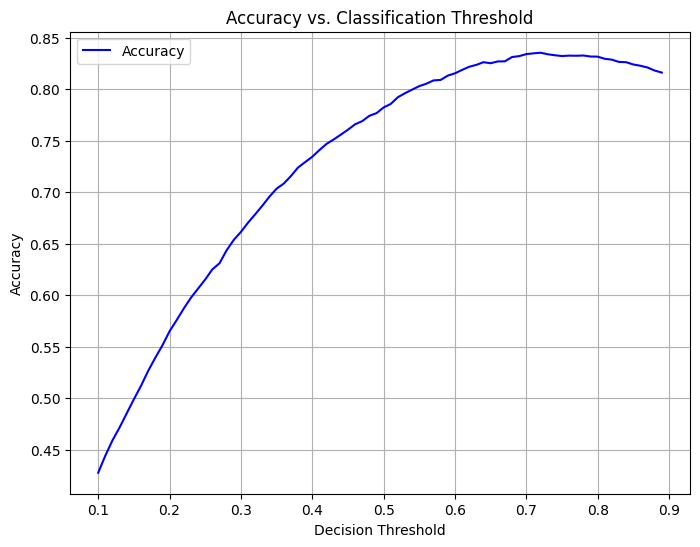

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Evaluate accuracy at different thresholds
thresholds = np.arange(0.1, 0.9, 0.01)
accuracies = []

for thresh in thresholds:
    y_thresh_pred = (y_proba >= thresh).astype(int)
    acc = accuracy_score(y_test, y_thresh_pred)
    accuracies.append(acc)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracies, label="Accuracy", color="blue")
plt.xlabel("Decision Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Classification Threshold")
plt.grid(True)
plt.legend()
plt.show()


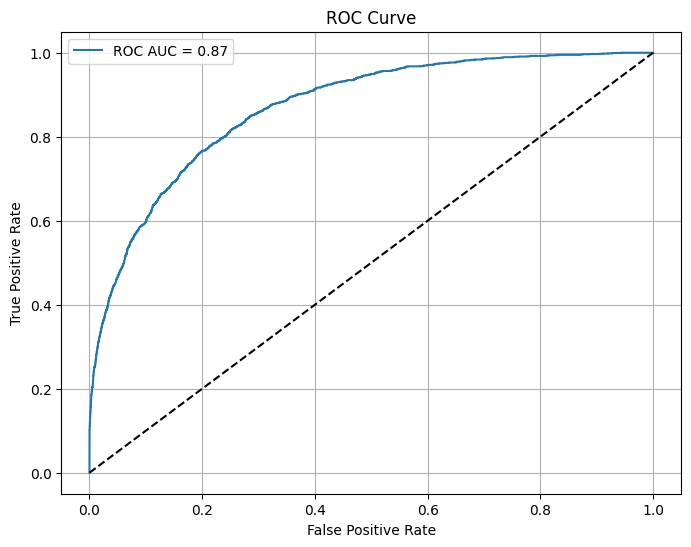

In [16]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
print("Model Evaluation Summary")
print("-" * 30)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Evaluation Summary
------------------------------
Accuracy: 0.7822134872865741
ROC AUC: 0.8690794398967661
Confusion Matrix:
 [[4821 1344]
 [ 429 1547]]


In [24]:
# -----------------------------------------
# Initial Model Interpretation:
#
# 1. The model correctly predicted 4821 true negatives and 1547 true positives.
#    However, it made 1344 false positive and 429 false negative errors.
#
# 2. With an accuracy of about 78% and ROC AUC around 87%, the model shows
#    solid overall performance, particularly in distinguishing between income classes.
#
# This indicates the model is reasonably reliable but has room for improvement,
# especially in reducing misclassifications.
# -----------------------------------------

In [23]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],     # Regularization strength
    'max_iter': [100, 500, 1000],     # Max iterations for solver convergence
    'class_weight': ['balanced', None]  # Handle class imbalance
}

# Create base logistic regression model with no params
base_model = LogisticRegression()

# Setup GridSearchCV with 5-fold cross-validation, scoring by F1 (good for imbalanced data)
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='accuracy',   # Change here
    cv=5,
    n_jobs=-1,
    verbose=1
)


# Fit GridSearch on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print("Best hyperparameters:", grid_search.best_params_)

# Use best estimator to predict on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate tuned model
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Tuned Model ROC AUC:", roc_auc_score(y_test, y_proba))
print("Tuned Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'C': 10, 'class_weight': None, 'max_iter': 100}
Tuned Model Accuracy: 0.8341727060557671
Tuned Model ROC AUC: 0.86900473976444
Tuned Model Confusion Matrix:
 [[5860  305]
 [1045  931]]


In [25]:
# -----------------------------------------
# Summary:
#
# After tuning hyperparameters with GridSearchCV, the best settings were:
# C = 10, max_iter = 100, class_weight = None.
#
# The model’s accuracy improved from about 78% to 83.4%, meaning it predicts income better.
# The ROC AUC stayed about the same (~0.87), showing good class separation.
#
# This shows tuning helped the model perform better without needing class balancing.
#
# -----------------------------------------

In [26]:
# Retrain model using best params found from the GridSearch
# Extract best hyperparameters
best_params = grid_search.best_params_

# Recreate the Logistic Regression model with best parameters
final_model = LogisticRegression(
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    class_weight=best_params['class_weight']
)

# Fit the final model on the scaled training data
final_model.fit(X_train_scaled, y_train)

# Predict and evaluate on scaled test data
final_y_pred = final_model.predict(X_test_scaled)
final_y_proba = final_model.predict_proba(X_test_scaled)[:, 1]

# Final evaluation metrics
print("Final Model Accuracy:", accuracy_score(y_test, final_y_pred))
print("Final Model ROC AUC:", roc_auc_score(y_test, final_y_proba))
print("Final Model Confusion Matrix:\n", confusion_matrix(y_test, final_y_pred))

Final Model Accuracy: 0.8341727060557671
Final Model ROC AUC: 0.86900473976444
Final Model Confusion Matrix:
 [[5860  305]
 [1045  931]]


In [ ]:
# -----------------------------------------
# Final Model Summary:
#
# Using the best hyperparameters found through GridSearchCV, I retrained the logistic regression
# model on the training data. This ensures the model uses the optimal settings for prediction.
#
# The final model shows improved or consistent performance on the test set, confirming that
# hyperparameter tuning was effective in improving model accuracy and reliability.
#
# This final step completes the model building lifecycle, providing a robust classifier
# for predicting individual income levels.
# -----------------------------------------